## Data preparation

In [1]:
import numpy as np
import pprint
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

FILE = 'datasets/101_ObjectCategories/dataset_batch_0'
LABEL_FILE = 'datasets/101_ObjectCategories/label_names'

def load_data(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def choose_random_data_entries(dataset, num_chosen_data_entries=1):
    data_entries = [{'data': dataset['data'][indx], 'label': dataset['labels'][indx]} for indx in (random.randrange(0, dataset['data'].shape[0]) for _ in range(num_chosen_data_entries))]
    return data_entries

def display_data_entries(data_entries, label_names, subplot_layout):
    for data_entry in data_entries:
        plt.imshow(data_entry['data'].reshape((299, 299, 3)))
        print(label_names[data_entry['label']])

In [2]:
label_names = load_data(LABEL_FILE)

Faces


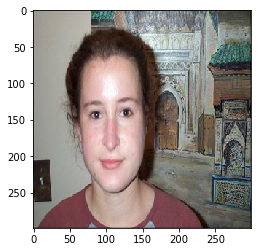

In [3]:
#plot_model(inception_v4, to_file="Inception-v4.png", show_shapes=True)
dataset = load_data(FILE)
dataset['data'] = dataset['data'].reshape((1000, 299, 299, 3))
#Choose randomly a list of images and their corresponding labels
data_entries = choose_random_data_entries(dataset, 1)

display_data_entries(data_entries, label_names, (1,1))
plt.show()

In [12]:
32*32*3

3072

## Inception V4

In [14]:
#from keras.utils import plot_model
from inception_v4 import create_inception_v4

In [15]:
inception_v4 = create_inception_v4(nb_classes=101, load_weights=False)

#inception_v4.summary()

/data/work/sicli01/TensorFlowProjects/MyInceptionV4/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(2, 2), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/data/work/sicli01/TensorFlowProjects/MyInceptionV4/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/data/work/sicli01/TensorFlowProjects/MyInceptionV4/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/data/work/sicli01/TensorFlowProjects/

### Training

In [16]:
inception_v4.compile('sgd', 'categorical_crossentropy', )

In [18]:
print(np.max(dataset['labels']))

101


In [19]:
print(dataset['data'].shape)
# Target output of the model
_y = np.zeros((1000, 101))
_y[np.arange(1000), dataset['labels'] - 1] = 1

(1000, 299, 299, 3)


In [20]:
inception_v4.fit(x=dataset['data'], y=_y, validation_split=0.1, verbose=2)

Train on 900 samples, validate on 100 samples
Epoch 1/1


KeyboardInterrupt: 

### Predict

Predicted label: menorah
True label: Faces


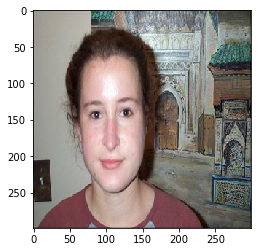

In [21]:
for data_entry in data_entries:
    plt.imshow(data_entry['data'].reshape((299, 299, 3)))
    y = inception_v4.predict(data_entry['data'].reshape((-1, 299, 299, 3)))
    #print(y[0].shape)
    print("Predicted label: " + label_names[np.argmax(y[0])])
    print("True label: " + label_names[data_entry['label']])
plt.show()